<a href="https://colab.research.google.com/github/pastoril10/MercadoFinanceiro_analise6bancos/blob/main/MercadoFinanceiro_analise6bancos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 7.7 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24109 sha256=4bdeeea85aa27b9607d15bbddb492c7f5977d3bb4bfda678604a47158bef8cb5
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
import pandas_datareader.data as wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from datetime import datetime

import yfinance as yf
yf.pdr_override()

# Coletando dados

In [3]:
start = datetime(2019, 1, 1)

Banco do Brasil	- BBAS3

Bradesco -	BBDC4

Itaú Unibanco	- ITUB4

Santander	- SANB11

BTG Pactual - BPAC11

Banco Inter - BIDI11 (IPO em 27 de abr. de 2018 )

In [4]:
bbdc4 = wb.get_data_yahoo("BBDC4.SA", start = start) # Bradesco - BBDC4
bbas3 = wb.get_data_yahoo("BBAS3.SA", start = start) # Banco do Brasil - BBAS3
itub4 = wb.get_data_yahoo("ITUB4.SA", start = start) # Itaú Unibanco - ITUB4
sanb11 = wb.get_data_yahoo("SANB11.SA", start = start) # Santander - SANB11
bpac11 = wb.get_data_yahoo("BPAC11.SA", start = start) # BTG Pactual - BPAC11
bidi11 = wb.get_data_yahoo("BIDI11.SA", start = start) # Banco Inter - BIDI11


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
bbdc4.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-27,20.50,21.030001,20.440001,20.559999,20.541054,28864500.0
2021-10-28,20.50,20.680000,20.150000,20.490000,20.471119,26560800.0
2021-10-29,20.60,20.629999,19.900000,19.900000,19.881662,27971000.0
2021-11-01,20.24,20.730000,20.090000,20.590000,20.571026,27856400.0
2021-11-03,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#ordenando os tickers das ações em ordem alfabética 
tickers = ["bbdc4", "bbas3", "itub4", "sanb11", "bpac11", "bidi11"]
tickers = sorted(tickers)
tickers

['bbas3', 'bbdc4', 'bidi11', 'bpac11', 'itub4', 'sanb11']

Concatenando os DataFrames do banco juntos em um único. 

Definindo o argumento das chaves igual à lista de tickers. 

Concatenando por coluna e não por linha com o axis=1:


In [7]:
bancos = pd.concat([bbas3, bbdc4, bidi11, bpac11, itub4, sanb11], axis=1, keys=tickers)
bancos.tail()

bbas3                        ...     sanb11                      
                 Open       High        Low  ...      Close  Adj Close     Volume
Date                                         ...                                 
2021-10-27  29.280001  29.900000  29.170000  ...  35.060001  35.060001  5152400.0
2021-10-28  29.250000  29.290001  28.639999  ...  35.060001  35.060001  2438800.0
2021-10-29  29.170000  29.170000  28.389999  ...  34.400002  34.400002  1758500.0
2021-11-01  28.959999  29.590000  28.820000  ...  35.959999  35.959999  2296100.0
2021-11-03  29.049999  29.840000  28.920000  ...  36.529999  36.529999  1263100.0

[5 rows x 36 columns]

In [8]:
#Definindo os níveis dos nomes das colunas
bancos.columns.names = ['Bancos Ticker','Informações']
bancos.tail()

Bancos Ticker      bbas3                        ...     sanb11                      
Informações         Open       High        Low  ...      Close  Adj Close     Volume
Date                                            ...                                 
2021-10-27     29.280001  29.900000  29.170000  ...  35.060001  35.060001  5152400.0
2021-10-28     29.250000  29.290001  28.639999  ...  35.060001  35.060001  2438800.0
2021-10-29     29.170000  29.170000  28.389999  ...  34.400002  34.400002  1758500.0
2021-11-01     28.959999  29.590000  28.820000  ...  35.959999  35.959999  2296100.0
2021-11-03     29.049999  29.840000  28.920000  ...  36.529999  36.529999  1263100.0

[5 rows x 36 columns]

# Análises exploratórias 

Análise de dados exploratória.

Pergunta: Qual é o preço máximo de fechamento para cada banco durante todo o período?

In [9]:

bancos.xs('Close', level='Informações', axis=1).max()

Bancos Ticker
bbas3     55.180000
bbdc4     35.827271
bidi11    85.279999
bpac11    32.270000
itub4     39.689999
sanb11    51.040001
dtype: float64

In [10]:
retorno = pd.DataFrame()
for tick in tickers:
    retorno[tick + 'Return'] = bancos[tick]['Close'].pct_change()

In [11]:
retorno.tail()

,bbas3Return,bbdc4Return,bidi11Return,bpac11Return,itub4Return,sanb11Return
Date,,,,,,
2021-10-27,-0.001027,0.013307,0.007032,0.014235,0.007582,-0.000285
2021-10-28,-0.008913,-0.003405,-0.014713,-0.003070,-0.002090,0.000000
2021-10-29,-0.014182,-0.028795,-0.088838,-0.003520,-0.023460,-0.018825
2021-11-01,0.022807,0.034673,0.175278,0.041501,0.039039,0.045349
2021-11-03,0.012350,0.000000,0.026471,0.008054,0.013212,0.015851


Pergunta: Em quais datas cada ação dos bancos teve o melhor dia de retorno?

In [12]:
## retorna o index do valor maximo (index é a data do ocorrido)
retorno.idxmax()

bbas3Return    2020-03-24
bbdc4Return    2020-03-13
bidi11Return   2021-05-24
bpac11Return   2020-03-13
itub4Return    2020-03-13
sanb11Return   2020-03-24
dtype: datetime64[ns]

Pergunta: Em quais datas cada ação dos bancos teve o pior dia de retorno?

In [13]:
## retorna o index do valor maximo (index é a data do ocorrido)
retorno.idxmin()

bbas3Return    2020-03-16
bbdc4Return    2020-03-16
bidi11Return   2020-03-09
bpac11Return   2020-03-12
itub4Return    2021-10-04
sanb11Return   2020-03-12
dtype: datetime64[ns]

Nota-se que 5 bancos tiveram o pior dia em abril de 2020 e 1 banco no inicio de abril, esse periodo foi o do incio da pandamia do corona virus no Brasil

Pergunta: Qual ação foi a ação mais arriscada durante todo o período de tempo?

Para isso, é apropriado olhar o desvio padrão das ações.

In [14]:
retorno.std()

bbas3Return     0.027907
bbdc4Return     0.026321
bidi11Return    0.045907
bpac11Return    0.036638
itub4Return     0.023817
sanb11Return    0.025767
dtype: float64

O banco que mais oscilou em torno do seu valor médio foi o banco inter

Pergunta: Qual a mais arriscada para o ano 2019 (ano antes da pandemia)

A mais arriscada em 2019 foi o Banco Inter

In [16]:
por_data = retorno.copy()
por_data.reset_index(inplace = True)
por_data['Date'] = pd.to_datetime(por_data['Date'])
por_data['Year'] = por_data['Date'].apply(lambda time: time.year) # Criando coluna com o ano de cada ação
por_data[por_data['Year'] == 2019].std() #Pegando desvio padrão

bbas3Return     0.019078
bbdc4Return     0.016580
bidi11Return    0.041474
bpac11Return    0.029939
itub4Return     0.015607
sanb11Return    0.016136
Year            0.000000
dtype: float64

Pergunta: Qual a mais arriscada para o ano 2020 (ano da pandemia).

O Banco mais arriscado foi O BTG e o Banco inter

In [17]:
por_data[por_data['Year'] == 2020].std() #Pegando desvio padrão

bbas3Return     0.039046
bbdc4Return     0.036929
bidi11Return    0.046034
bpac11Return    0.049372
itub4Return     0.030417
sanb11Return    0.035499
Year            0.000000
dtype: float64

Criando um plot de distribuição dos retornos de 2019 para o BBAS3

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


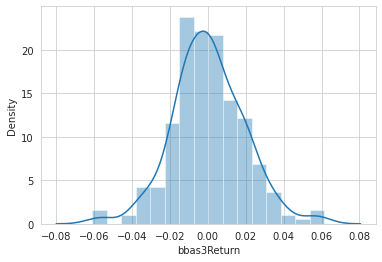

In [18]:
sns.distplot(por_data[por_data['Year'] == 2019]['bbas3Return'])

Gráfico de linha mostrando o preço de fechamento para cada banco em relação ao tempo.

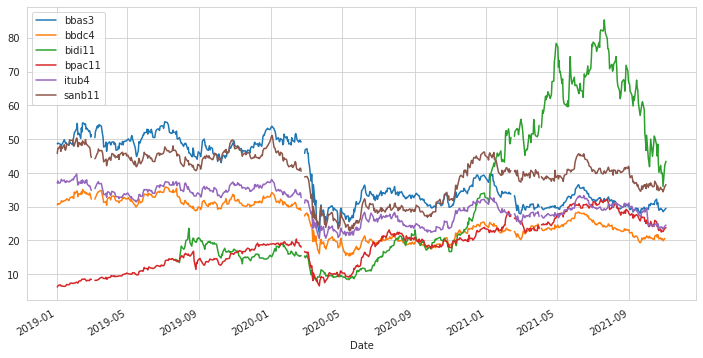

In [20]:
for tick in tickers:
    bancos[tick]['Close'].plot(figsize=(12,6), label=tick)
    # ou bancos.xs(key='Close', level='Stock Info', axis=1).plot()
plt.legend()

Nota-se uma queda nas ações no período da pandemia do coronavirus

Traçando média móvel de 30 dias para o preço das ações do bbas3 para o ano de 2020.



Text(0.5, 1.0, 'Média movel e fechamento das ações do Banco do Brasil no ano de 2020')

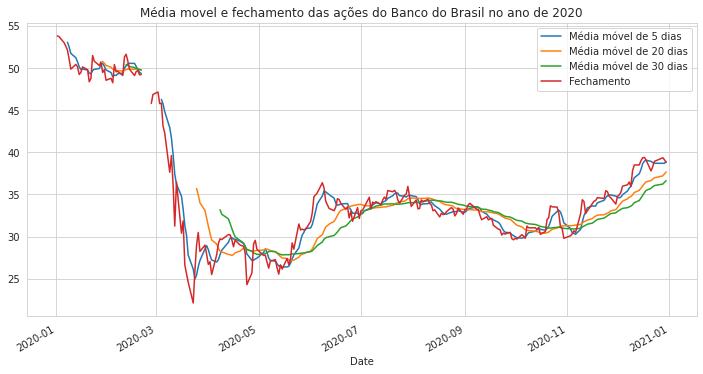

In [26]:
plt.figure(figsize=(12,6))
bb2020 = bbas3['Close'][bbas3.index.year == 2020]
bb2020_mm5 = bb2020.rolling(5).mean().plot(label = 'Média móvel de 5 dias')
bb2020_mm20 = bb2020.rolling(20).mean().plot(label = 'Média móvel de 20 dias')
bb2020_mm = bb2020.rolling(30).mean().plot(label = 'Média móvel de 30 dias')
bb2020.plot(label = 'Fechamento')
plt.legend()
plt.title("Média movel e fechamento das ações do Banco do Brasil no ano de 2020")

In [ ]:
plt.figure(figsize=(12,6))
bb2020 = bbas3['Close'][bbas3.index.year == 2020]
bb2020_mm5 = bb2020.rolling(5).mean().plot(label = 'Média móvel de 5 dias')
bb2020_mm20 = bb2020.rolling(20).mean().plot(label = 'Média móvel de 20 dias')
bb2020_mm = bb2020.rolling(30).mean().plot(label = 'Média móvel de 30 dias')
bb2020.plot(label = 'Fechamento')
plt.legend()
plt.title("Média movel e fechamento das ações do Banco do Brasil no ano de 2020")

Mapa de calor da correlação entre os preços de fechamento das ações:

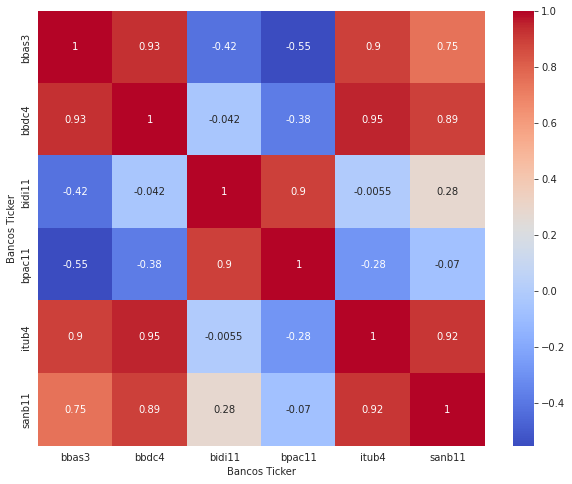

In [23]:
corr = bancos.xs(key='Close', level='Informações', axis=1).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', annot=True)

Nota- se grandes correlações entre as ações:


*   Banco inter e BTG Pactual
*   Banco Bradesco e Itau
*   Banco Santander e Itau
*   Banco do Brasil e Itau
*   Banco do Brasil e Bradesco

Menor correlação se da entre:

*   Banco itau e Banco inter
*   Banco Inter e Bradesco



Existe uma relação grande entre os grandes bancos tradicionais, assim como existe uma relação grande entre os bancos digitais.

Mostrando também clustermap para agrupar as correlações:

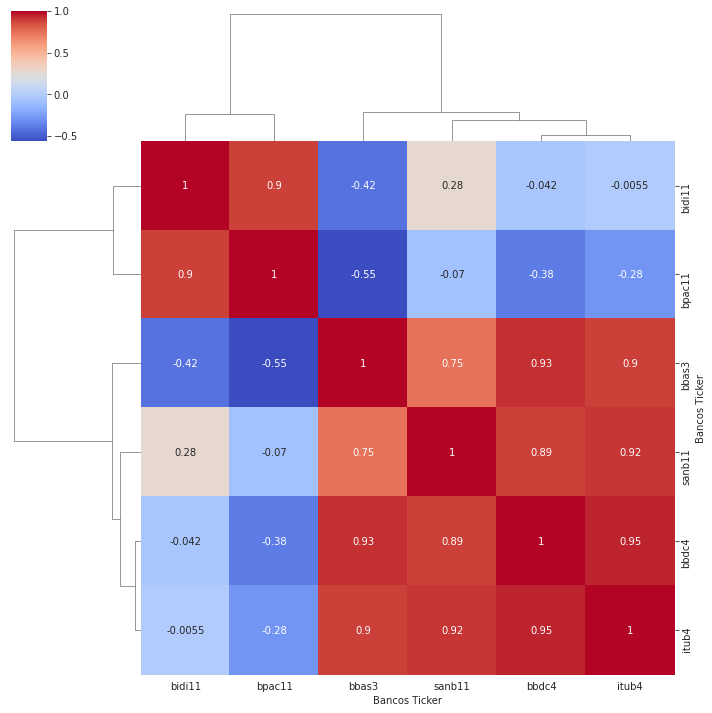

In [24]:
sns.clustermap(corr, cmap='coolwarm', annot=True)